In [18]:
# import wget
import wget
# Following line downloads FASTA file containing the lambda phage reference genome

wget http://d28rh4a8wq0iu5.cloudfront.net/ads1/data/lambda_virus.fa
## That does not go there. Put it in the Terminal. Then it works. 

SyntaxError: invalid syntax (302057357.py, line 5)

In [21]:
def readGenome(filename):
    genome = ''
    with open(filename,'r') as f:
      for line in f:
        if not line[0] == '>':
            genome += line.rstrip()
    return genome
genome = readGenome('C:\gitfiles\Projects\Bioinformatics\lambda_virus.fa') 
genome[:100]

'GGGCGGCGACCTCGCGGGTTTTCGCTATTTATGAAAATTTTCCGGTTTAAGGCGTTTCCGTTCTTCTTCGTCATAACTTAATGTTTTTATTTAAAATACC'

In [22]:
len(genome)

48502

In [23]:
counts = {'A':0, 'T':0, 'C':0,'G':0}
for base in genome:
    counts[base] += 1
print(counts)

{'A': 12334, 'T': 11986, 'C': 11362, 'G': 12820}


In [24]:
import collections
collections.Counter(genome)

Counter({'G': 12820, 'C': 11362, 'A': 12334, 'T': 11986})

```A note on base Quality```
  
	
<b> Q = -10 · log^10p

</b>
p = probability that base call is correct
 
Q = Base Quality


Q = 10 --> 1 in 10 chance call is incorrect


Q = 20 --> 1 in 100


Q = 30 --> 1 in 1,000

SyntaxError: invalid syntax (2438500247.py, line 1)

In [5]:
def readFastq(filename):
    sequences = []
    qualities = []
    with open (filename) as fh:
        while True:
            fh.readline()
            seq = fh.readline()
            fh.readline()
            qual = fh.readline().rstrip()
            if len (seq) == 0:
                break
            sequences.append(seq)
            qualities.append(qual)
    return sequences, qualities
seqs, quals = readFastq(r"C:\Users\\amcfa\\gitfiles\\Projects\\Bioinformatics\\SRR835775_1.first1000.fastq")

In [6]:
print(quals[:5])

['???B1ADDD8??BB+C?B+:AA883CEE8?C3@DDD3)?D2;DC?8?=BAD=@C@(.6.6=A?=?@##################################', 'CCCFFFFFGHHGHJJJJJIJGIIJJJJJJJIJIJJJJJFJJFGIIIIH=CBFCF=CCEG)=>EHB2@@DEC>;;?=;(=?BBD?59?BA###########', '@@<DD?DDHHH<CBHII:CFGIGAGHIIG?CCGGE0BDHIIHIGICH8=FHGI=@EHGGGEEHH>);?CC@.;(=;?59,5<A599?CB>ABBCB><88A', '@CCFFDDFHHHDFHIJJCGGIJJHIIHJC?DHHIJ0?DGHI9BBFHICGGIGI=CDEGI=?AAEF7@?################################', '@<@FDFDDBBFHH@EBGGGEH@FFHE;EHIEGGBHG?)9?8BDGGBGGBCDGI=93=C6==C;CCD(?@>@#############################']


In [7]:
def phred33ToQ(qual):
  return ord(qual) -33

In [8]:
# Now return that quality score
phred33ToQ('#')

2

In [9]:
# Boo a quality score of 2
phred33ToQ('J')

41

In [11]:
def createHist(qualities):
    hist = [0] * 50
    for qual in qualities:
        for phred in qual:
          q = phred33ToQ(phred)
          hist[q] += 1
    return hist
h = createHist(quals)
print(h)

[0, 0, 6178, 0, 0, 54, 108, 574, 345, 83, 193, 124, 79, 165, 49, 236, 184, 327, 514, 238, 531, 254, 313, 798, 992, 888, 1396, 1488, 993, 1752, 3387, 4487, 3248, 5476, 8375, 11814, 4243, 7827, 6579, 8179, 9349, 8180, 0, 0, 0, 0, 0, 0, 0, 0]


In [13]:
import matplotlib as mp
import matplotlib.pyplot as plt

<function matplotlib.pyplot.show(close=None, block=None)>

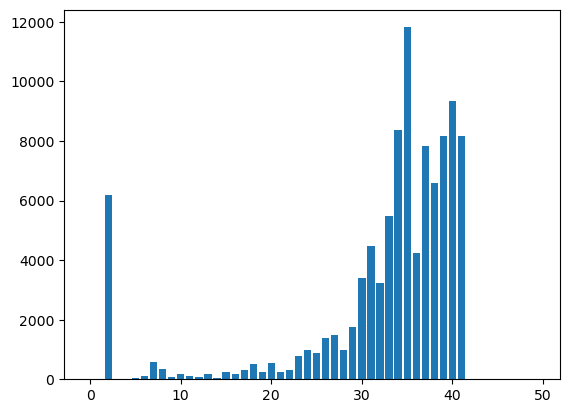

In [14]:
plt.bar(range(len(h)), h)
plt.show

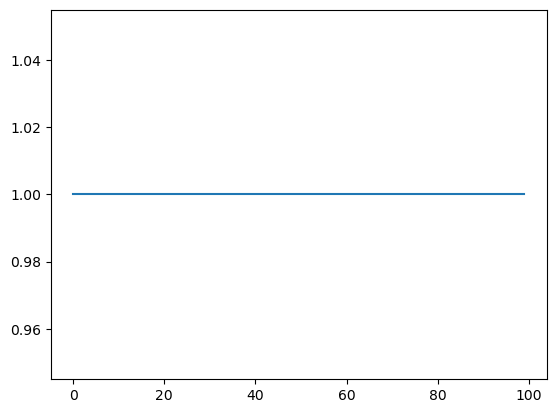

In [28]:
def findGCByPOS(reads):
    gc = [0] * 100
    totals = [0]* 100
    
    for read in reads:
        for i in range (len(read)):
            if read[i] =='C' or read[i] =='G':
              gc[i] += 1
              totals[i] += 1
    for i in range(len(gc)):
        if totals[i] > 0:
            gc[i] /= float(totals[i])
    return gc
gc = findGCByPOS(seqs)
plt.plot(range(len(gc)), gc)
plt.show()

## Well uh


In [27]:
import collections
count = collections.Counter()
for seq in seqs:
    count.update(seq)
count

Counter({'T': 21836, 'A': 21132, 'C': 28272, 'G': 28742, '\n': 1000, 'N': 18})